# Logistic Regression

## 시각화

In [1]:
import numpy as np
import matplotlib.pyplot as plt

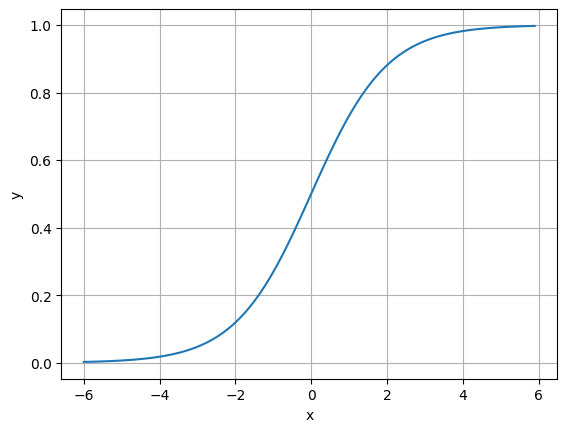

In [2]:
x = np.arange (-6, 6, 0.1)
y = 1 / (1+np.exp(-x))

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Scikit-learn을 이용한 Logistic Regression 분류기 구축

In [3]:
import pandas as pd
passengers = pd.read_csv('train.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
passengers.shape

(891, 12)

In [5]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**데이터 전처리**
1. 분석에 사용할 feature 고르기  
생존 여부에 중요한 영향을 미쳤을 것으로 예상되는 feature를 고르자 &rarr; Sex, Age, Pclass로 예상  
여성, 어린이, 1/2/3등 석 순으로 살아남을 확률이 높다는 가설을 세워본 것
2. 문자열을 숫자로 변환
3. 결측치 처리
4. feature 분리

In [6]:
# 문자열을 숫자로 변환
passengers['Sex']=passengers['Sex'].map({'female':1, 'male':0})

# 결측 데이터를 평균값으로 대체
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)

# feature 분리
dummies = pd.get_dummies(passengers['Pclass'])
del passengers['Pclass']
passengers = pd.concat([passengers, dummies], axis=1, join='inner')
passengers.rename(columns={1:'FirstClass',2:'SecondClass',3:'EtcClass'}, inplace=True)

passengers.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,EtcClass
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [7]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass','EtcClass']]
survival = passengers[['Survived']]

In [8]:
features

,Sex,Age,FirstClass,SecondClass,EtcClass
0,0,22.000000,0,0,1
1,1,38.000000,1,0,0
2,1,26.000000,0,0,1
3,1,35.000000,1,0,0
4,0,35.000000,0,0,1
...,...,...,...,...,...
886,0,27.000000,0,1,0
887,1,19.000000,1,0,0
888,1,29.699118,0,0,1
889,0,26.000000,1,0,0


In [9]:
survival

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [10]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, survival, test_size=0.3, random_state=42)

In [11]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/User/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
print('train 데이터에 대한 Accuracy :', model.score(X_train, y_train))
print('test 데이터에 대한 Accuracy :',model.score(X_test, y_test))

train 데이터에 대한 Accuracy : 0.7961476725521669
test 데이터에 대한 Accuracy : 0.8171641791044776


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred=model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)

Accuracy :  0.8171641791044776


<AxesSubplot: >

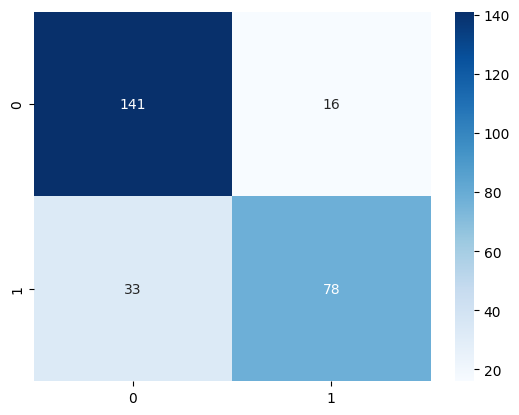

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

<AxesSubplot: >

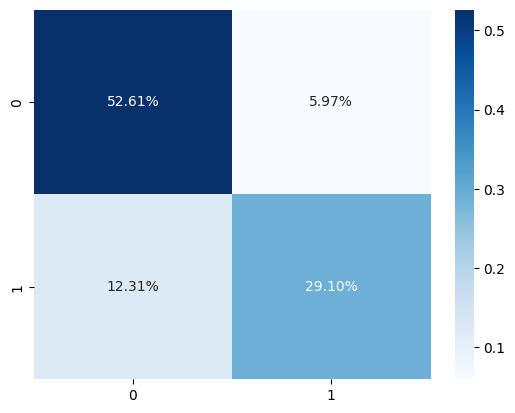

In [16]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

# Naive Bayes

## Scikit-learn을 이용한 나이브 베이즈 분류기 구축

In [17]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# 데이터셋 로드
iris=load_iris()
df=pd.DataFrame(data=np.c_[iris.data, iris.target], columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
# BernoulliNB : class가 2개일 때
# MultinomialNB : class가 3개 이상일 때
# GaussianNB : 가우시안 나이브 베이즈 모델

# train, test 분리
X=df[df.columns[:-1]]
y=df.target
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state = 42)

# Naive Bayes 모델 생성
model=MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred=model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)

Accuracy :  0.9555555555555556


<AxesSubplot: >

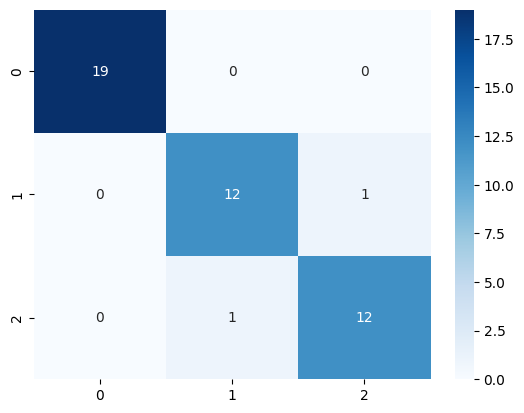

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

<AxesSubplot: >

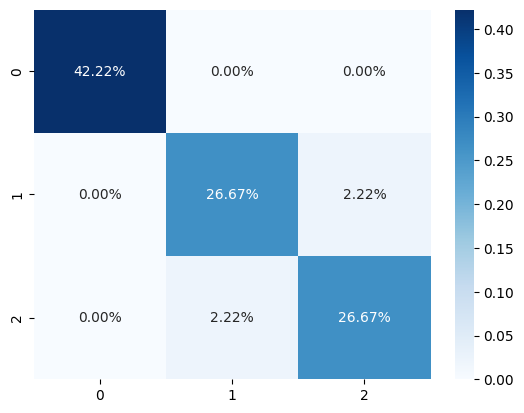

In [21]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')